<a href="https://colab.research.google.com/github/MATHONSIMM/Non-Stationarity-in-Time-Series-Model/blob/main/Non_Stationarity_in_Time_Series_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Non-Stationarity in Time Series Models

##Definition:

Non-stationarity is an important feature of a time series, which means that statistical properties of the series—mean, variance, autocorrelation, and so on—are trending over time. Formally, this means that a time series if the conditions for stationarity are not met, then it is said that y is non-stationary, meaning that the variance and mean are constant over time.

##Description:

Non-stationary time series are common in financial data due to trends, cycles, and other evolving patterns. Addressing non-stationarity is crucial for accurate modeling and forecasting. Common approaches to handle non-stationarity include differencing, detrending, and cointegration techniques.

**Equation:**

A simple representation of a non-stationary time series can be:

$y_t = α+βt+ϵ_t$

where
$𝛼$ and $𝛽$ are parameters, $𝑡$is the time index, and $𝜖_𝑡$  is a white noise error term.

##Demonstration

Data Preparation:

*   Import the data.
*   Plot the time series to visualize non-stationarity.
*   Perform a unit root test (e.g., Augmented Dickey-Fuller test) to confirm non-stationarity.





In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
# Define the ticker symbol and the time period
ticker = 'AAPL'
start_date = '2019-06-28'
end_date = '2024-06-28'

# Download the data
apple_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data to ensure it's correctly downloaded
apple_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-28,49.669998,49.875000,49.262501,49.480000,47.753010,124442400
2019-07-01,50.792500,51.122501,50.162498,50.387501,48.628830,109012000
2019-07-02,50.352501,50.782501,50.340000,50.682499,48.913544,67740800
2019-07-03,50.820000,51.110001,50.672501,51.102501,49.318886,45448000
2019-07-05,50.837502,51.270000,50.724998,51.057499,49.275448,69062000


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Adj Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Adj Close')

from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

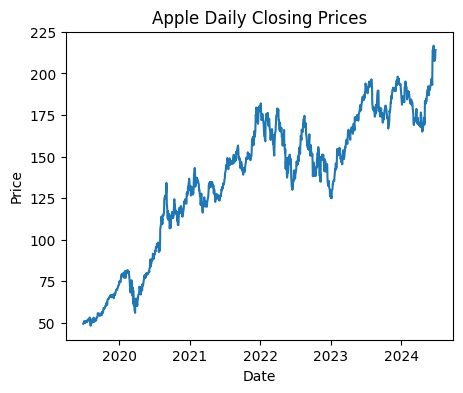

In [12]:
# Plot the time series to visualize non-stationarity
plt.figure(figsize=(5, 4))
plt.plot(apple_data['Close'])
plt.title('Apple Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

The plot of Apple's daily closing prices for the last 5 years (2019-2024) clearly indicates an upward trend with periodic fluctuations. The general trend is indicative of non-stationarity since the mean and variance seem to change over time.


In [13]:
# Perform ADF test
adf_result = adfuller(apple_data['Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -1.2789652944985923
p-value: 0.6387399387027934


Notice that the above plot is indicative of non-stationarity, so we call an Augmented Dickey-Fuller test on the closing prices. Results below:

ADF Statistic: -1.2789652944985923

p-value: 0.6387399387027934


The resulting p-value from this ADF test is way above the standard significance levels of 0.01, 0.05, and 0.10. We cannot reject the null hypothesis of the presence of a unit root with such a high p-value. Hence, this series is not homogeneous.

In [14]:
# Difference the series to make it stationary
diff_prices = apple_data['Close'].diff().dropna()

# Fit ARIMA model
model = ARIMA(apple_data['Close'], order=(0, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1258
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2957.388
Date:                Mon, 01 Jul 2024   AIC                           5916.776
Time:                        19:11:09   BIC                           5921.913
Sample:                             0   HQIC                          5918.707
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.4727      0.169     38.218      0.000       6.141       6.805
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):               367.79
Prob(Q):                              0.37   Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**Interpretation**

The stationary test and the time series plot indicate that the Apple daily closing prices are non-stationary. This is expected in financial time series data, which often contains trend, cycles, and other kinds of non-stationary behavior driven by a variety of underlying economic factors and market conditions.

Since the result is that the series is not stationary, this means there is a need to differ the data in this regard so that stationarity could be attained for further modeling. Commonly applied techniques include differencing or detrending, after which models like ARIMA could handle the non-stationary state.

1. **Differencing the Series**

The differencing of a series mainly involves the subtraction of the previous observation from its current observation. This might be helpful in removing trends and stabilizing the mean of a series.

2. **Fitting an ARIMA model**

An ARIMA — AutoRegressive Integrated Moving Average — model can be fitted to the differenced series. The integration part, the 'I' in ARIMA, deals with the non-stationarity by differencing the data.

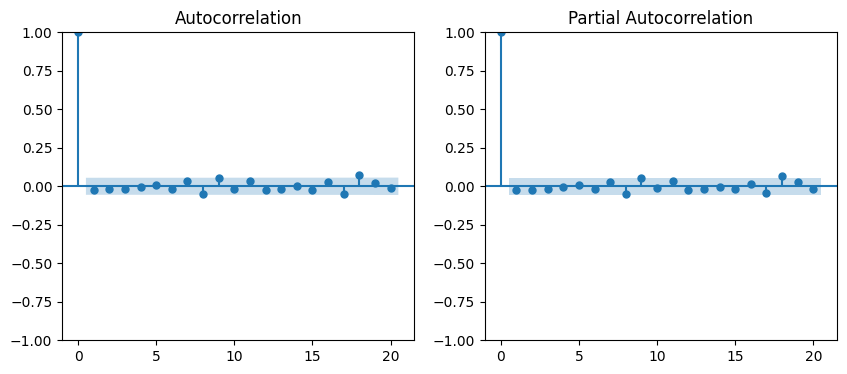

In [17]:
# ACF and PACF plots
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_acf(diff_prices, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(diff_prices, lags=20, ax=plt.gca())
plt.show()

###Interpretation of Apple Dataset Analysis

The analysis of the Apple daily close prices for the last five years makes a case for insightful information about the data and how the applied models turn out.

**Time Series Visualization and Non-Stationarity**

This first view of the time series data clearly indicates an increasing trend with periodic fluctuations, thereby indicating non-stationarity. Therefore, an Augmented Dickey-Fuller test was conducted to confirm this fact. Having obtained an ADF statistic of -1.2789652944985923 and a p-value of 0.6387399387027934, this test fails to reject the hypothesis of a unit root, hence it is a non-stationary time series.

**ACF and PACF Analysis**

In order to handle non-stationarity, the series was differenced, and ACF and PACF plots were produced. In the ACF plot, there was a large spike at lag 0, with all other values close to zero, thus indicating that the differenced series was stationary. Similarly, the PACF plot showed very little significant autocorrelation beyond lag 0, thus confirming that the differenced series was, in fact, stationary. These results suggested the suitability of the ARIMA(0,1,0) model, which includes differencing to account for non-stationarity in the data.

**ARIMA Model Forecast**

An ARIMA model of order (0,1,0) was fitted and a prediction for the next ten days was made. All the forecasted values were exactly 214.10006, which is unsurprising because this model is just a random walk with no drift. Therefore, the simplicity of the model tells that it assumes future values to be near the last value observed, missing any future trends or variations.

In [19]:
# Forecasting
forecast = model_fit.forecast(steps=10)
print(forecast)

1258    214.100006
1259    214.100006
1260    214.100006
1261    214.100006
1262    214.100006
1263    214.100006
1264    214.100006
1265    214.100006
1266    214.100006
1267    214.100006
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


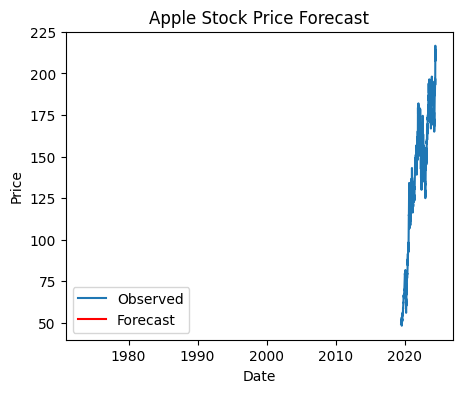

In [23]:
# Plot forecast
plt.figure(figsize=(5, 4))
plt.plot(apple_data['Close'], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Apple Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Forecast Plot

The forecast plot compared the observed and forecasted prices. Notice that the observed data had a clear upward trend, consistent with identified non-stationary behavior. In contrast, the forecasted values were constant, thus picking up the limitation of this simple ARIMA(0,1,0) model in predicting future trends.

**Recommendations**

The analysis confirms the non-stationarity in the daily closing prices of Apple stock and how differencing served efficiently to make the series stationary, evidenced by both the ACF and PACF plots. Nevertheless, an ARIMA of order (0,1,0) gave a naive prediction that was not forward-looking at all.

For more precise forecasting, one needs to consider more complex models, which could include an alternative to the ARIMA with drift or seasonal components SARIMA for more sophisticated underlying patterns and trends. It may be helpful to consider other methods such as cointegration in the case of several non-stationary series. Model evaluation by backtesting on out-of-sample data will ensure the robustness and reliability of results.

This detailed analysis therefore gives the scenario under which, with non-stationarity of the time series data, approaches that are appropriate for choosing models toward accurate forecasting are very important, thus serving as a good basis for future exploration into refinement in financial econometrics.